In [1]:
import numpy as np
import requests
import pandas as pd
import bs4
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as pltdate
from bs4 import BeautifulSoup as soup

In [2]:
#First we make a request to get the html of the Space Weather Live page.

swlr = requests.get('https://cmsc320.github.io/files/top-50-solar-flares.html', auth=('user', 'pass'))

In [3]:
#Get the page in an easier to parse format

swls = soup(swlr.text, "html.parser")

In [4]:
print(swls.prettify()[:400])

<!DOCTYPE html>
<html class="fontawesome-i2svg-active fontawesome-i2svg-complete" lang="en">
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="content-type"/>
  <title>
   Top 50 solar flares | Solar activity | SpaceWeatherLive.com
  </title>
  <meta charset="utf-8"/>
  <meta content="index, follow, max-snippet:-1, max-image-preview:large, max-video-preview:-1" name="robots"/>
  <meta


In [5]:
#Find the table with the data for CMEs

swlthtml = swls.find("table", {"class":"table table-striped table-responsive-md"})
print(swlthtml.text)

RegionStartMaximumEnd1X28+2003/11/04048619:2919:5320:06 MovieView archive2X20+2001/04/02939321:3221:5122:03 MovieView archive3X17.2+2003/10/28048609:5111:1011:24 MovieView archive4X17+2005/09/07080817:1717:4018:03 MovieView archive5X14.42001/04/15941513:1913:5013:55 MovieView archive6X102003/10/29048620:3720:4921:01 MovieView archive7X9.41997/11/06810011:4911:5512:01 MovieView archive8X9.32017/09/06267311:5312:0212:10 MovieView archive9X92006/12/05093010:1810:3510:45 MovieView archive10X8.32003/11/02048617:0317:2517:39 MovieView archive11X8.22017/09/10267315:3516:0616:31 MovieView archive12X7.12005/01/20072006:3607:0107:26 MovieView archive13X6.92011/08/09126307:4808:0508:08 MovieView archive14X6.52006/12/06093018:2918:4719:00 MovieView archive15X6.22005/09/09080819:1320:0420:36 MovieView archive16X6.22001/12/13973314:2014:3014:35 MovieView archive17X5.72000/07/14907710:0310:2410:43 MovieView archive18X5.62001/04/06941519:1019:2119:31 MovieView archive19X5.42012/03/07142900:0200:2400:4

In [6]:
#Read the table into a Pandas dataframe

swl = pd.read_html(swlthtml.prettify(), flavor="bs4")[0]
swl.head(5)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Region,Start,Maximum,End,Unnamed: 7
0,1,X28+,2003/11/04,486,19:29,19:53,20:06,Movie View archive
1,2,X20+,2001/04/02,9393,21:32,21:51,22:03,Movie View archive
2,3,X17.2+,2003/10/28,486,09:51,11:10,11:24,Movie View archive
3,4,X17+,2005/09/07,808,17:17,17:40,18:03,Movie View archive
4,5,X14.4,2001/04/15,9415,13:19,13:50,13:55,Movie View archive


In [7]:
#Reformat the dataframe for clarity

swl = swl.rename(columns={'Unnamed: 0':'Rank','Unnamed: 1':'X Class', 'Unnamed: 2':'Date', 
                              'Start':'Start Time', 'Maximum':'Max Time', 
                              'End':'End Time', 'Unnamed: 7':'Movie'})
swl = swl.drop('Movie', axis=1)
swl.head(5)

,Rank,X Class,Date,Region,Start Time,Max Time,End Time
0,1,X28+,2003/11/04,486,19:29,19:53,20:06
1,2,X20+,2001/04/02,9393,21:32,21:51,22:03
2,3,X17.2+,2003/10/28,486,09:51,11:10,11:24
3,4,X17+,2005/09/07,808,17:17,17:40,18:03
4,5,X14.4,2001/04/15,9415,13:19,13:50,13:55


In [8]:
#Concatenate Datetime information into 3 columns, start, max, and end

#These arrays store values sequentially and will be used as the three columns in the output
swl_start_times = []
swl_max_times = []
swl_end_times = []

for index, row in swl.iterrows():
    date_str = row['Date'].split('/')
    date = dt.date(int(date_str[0]), int(date_str[1]), int(date_str[2]))
    
    start_time_str = row['Start Time'].split(':')
    start_time = dt.time(int(start_time_str[0]), int(start_time_str[1]))
    
    max_time_str = row['Max Time'].split(':')
    max_time = dt.time(int(max_time_str[0]), int(max_time_str[1]))
    
    end_time_str = row['End Time'].split(':')
    end_time = dt.time(int(end_time_str[0]), int(end_time_str[1]))
    
    swl_start_times.append(dt.datetime.combine(date, start_time))
    swl_max_times.append(dt.datetime.combine(date, max_time))
    swl_end_times.append(dt.datetime.combine(date, end_time))
    
swl = swl.drop('End Time', axis=1).drop('Max Time', axis=1).drop('Start Time', axis=1).drop('Date', axis=1)
swl.insert(loc=2, column='End Time', value=swl_end_times)
swl.insert(loc=2, column='Max Time', value=swl_max_times)
swl.insert(loc=2, column='Start Time', value=swl_start_times)
swl.head(5)

,Rank,X Class,Start Time,Max Time,End Time,Region
0,1,X28+,2003-11-04 19:29:00,2003-11-04 19:53:00,2003-11-04 20:06:00,486
1,2,X20+,2001-04-02 21:32:00,2001-04-02 21:51:00,2001-04-02 22:03:00,9393
2,3,X17.2+,2003-10-28 09:51:00,2003-10-28 11:10:00,2003-10-28 11:24:00,486
3,4,X17+,2005-09-07 17:17:00,2005-09-07 17:40:00,2005-09-07 18:03:00,808
4,5,X14.4,2001-04-15 13:19:00,2001-04-15 13:50:00,2001-04-15 13:55:00,9415


In [9]:
#Drop missing values
swl = swl.replace('-', np.NAN)
swl.head(5)

,Rank,X Class,Start Time,Max Time,End Time,Region
0,1,X28+,2003-11-04 19:29:00,2003-11-04 19:53:00,2003-11-04 20:06:00,486
1,2,X20+,2001-04-02 21:32:00,2001-04-02 21:51:00,2001-04-02 22:03:00,9393
2,3,X17.2+,2003-10-28 09:51:00,2003-10-28 11:10:00,2003-10-28 11:24:00,486
3,4,X17+,2005-09-07 17:17:00,2005-09-07 17:40:00,2005-09-07 18:03:00,808
4,5,X14.4,2001-04-15 13:19:00,2001-04-15 13:50:00,2001-04-15 13:55:00,9415


In [10]:
#Make a request to the page of NASA's CME observations.
nasar = requests.get('http://www.hcbravo.org/IntroDataSci/misc/waves_type2.html', auth=('user', 'pass'))
nasar.text[:100]

'<html><body>\n<h2>Wind/WAVES type II bursts and CMEs</h2>\n<a href="waves_type2_description.htm">A Bri'

In [11]:
#Parse html into a more readable form

nasas = soup(nasar.text, "html.parser")
print(nasas.prettify()[:200])

<html>
 <body>
  <h2>
   Wind/WAVES type II bursts and CMEs
  </h2>
  <a href="waves_type2_description.htm">
   A Brief Description
  </a>
  <pre>
NOTE: List includes DH type II bursts observed by Win


In [12]:
#Find the tag that contains the data we want

nasathtml = nasas.find("pre")
print(nasathtml.getText()[:995])


NOTE: List includes DH type II bursts observed by Wind spacecraft, 
but after STEREO launch on Oct 2006 the start and end times and 
frequencies of bursts are determined using both Wind and STEREO 
observations

                DH Type II                       Flare                     CME                   
----------------------------------------   -----------------   --------------------------   Plots
Start            End          Frequency     Loc   NOAA  Imp    Date  Time CPA  Width  Spd        
(1)        (2)   (3)   (4)   (5)    (6)     (7)    (8)  (9)    (10)  (11) (12)  (13) (14)   (15) 
1997/04/01 14:00 04/01 14:15  8000  4000   S25E16  8026 M1.3   04/01 15:18   74   79  312   PHTX
1997/04/07 14:30 04/07 17:30 11000  1000   S28E19  8027 C6.8   04/07 14:27 Halo  360  878   PHTX



In [13]:
#Split the tag by line breaks. Select the lines with data.

nasalines = nasathtml.getText().splitlines()
nasalines = nasalines[12:-2]
nasalines[0:5]

['1997/04/01 14:00 04/01 14:15  8000  4000   S25E16  8026 M1.3   04/01 15:18   74   79  312   PHTX',
 '1997/04/07 14:30 04/07 17:30 11000  1000   S28E19  8027 C6.8   04/07 14:27 Halo  360  878   PHTX',
 '1997/05/12 05:15 05/14 16:00 12000    80   N21W08  8038 C1.3   05/12 05:30 Halo  360  464   PHTX',
 '1997/05/21 20:20 05/21 22:00  5000   500   N05W12  8040 M1.3   05/21 21:00  263  165  296   PHTX',
 '1997/09/23 21:53 09/23 22:16  6000  2000   S29E25  8088 C1.4   09/23 22:02  133  155  712   PHTX']

In [14]:
nasalines[0].split()

['1997/04/01',
 '14:00',
 '04/01',
 '14:15',
 '8000',
 '4000',
 'S25E16',
 '8026',
 'M1.3',
 '04/01',
 '15:18',
 '74',
 '79',
 '312',
 'PHTX']

In [15]:
#Format these lines into Pandas dataframe information

nasa = pd.DataFrame()

lines = []

for line in nasalines:
    lines.append(line.split()[:14])
    
nasa = nasa.append(lines)

nasa.columns = ["Start Date", "Start Time", "End Date", "End Time", "Start Frequency",
                "End Frequency", "Flare Location", "Flare Region", "Flare Classification",
                "CME Date", "CME Time", "CME Angle", "CME Width", "CME Speed"]

nasa

,Start Date,Start Time,End Date,End Time,Start Frequency,End Frequency,Flare Location,Flare Region,Flare Classification,CME Date,CME Time,CME Angle,CME Width,CME Speed
0,1997/04/01,14:00,04/01,14:15,8000,4000,S25E16,8026,M1.3,04/01,15:18,74,79,312
1,1997/04/07,14:30,04/07,17:30,11000,1000,S28E19,8027,C6.8,04/07,14:27,Halo,360,878
2,1997/05/12,05:15,05/14,16:00,12000,80,N21W08,8038,C1.3,05/12,05:30,Halo,360,464
3,1997/05/21,20:20,05/21,22:00,5000,500,N05W12,8040,M1.3,05/21,21:00,263,165,296
4,1997/09/23,21:53,09/23,22:16,6000,2000,S29E25,8088,C1.4,09/23,22:02,133,155,712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,2014/12/13,14:27,12/13,14:51,14000,3900,W90b,-----,----,12/13,14:24,Halo,360,2222
478,2014/12/17,04:09,12/17,04:19,2900,2100,S11E33,12241,M1.1,12/17,02:00,107,108,869
479,2014/12/17,05:00,12/17,05:09,14000,11500,S20E09,12242,M8.7,12/17,05:00,Halo,360,587
480,2014/12/18,22:31,12/18,22:54,5100,1300,S11E15,12241,M6.9,12/19,01:04,Halo,360,1195


In [16]:
#Remove missing information

nasa = nasa.replace(['-----', '----', '--/--', '--:--'], np.NAN)
nasa['Flare Classification'] = nasa['Flare Classification'].replace('FILA', np.NAN)
nasa

,Start Date,Start Time,End Date,End Time,Start Frequency,End Frequency,Flare Location,Flare Region,Flare Classification,CME Date,CME Time,CME Angle,CME Width,CME Speed
0,1997/04/01,14:00,04/01,14:15,8000,4000,S25E16,8026,M1.3,04/01,15:18,74,79,312
1,1997/04/07,14:30,04/07,17:30,11000,1000,S28E19,8027,C6.8,04/07,14:27,Halo,360,878
2,1997/05/12,05:15,05/14,16:00,12000,80,N21W08,8038,C1.3,05/12,05:30,Halo,360,464
3,1997/05/21,20:20,05/21,22:00,5000,500,N05W12,8040,M1.3,05/21,21:00,263,165,296
4,1997/09/23,21:53,09/23,22:16,6000,2000,S29E25,8088,C1.4,09/23,22:02,133,155,712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,2014/12/13,14:27,12/13,14:51,14000,3900,W90b,NaN,NaN,12/13,14:24,Halo,360,2222
478,2014/12/17,04:09,12/17,04:19,2900,2100,S11E33,12241,M1.1,12/17,02:00,107,108,869
479,2014/12/17,05:00,12/17,05:09,14000,11500,S20E09,12242,M8.7,12/17,05:00,Halo,360,587
480,2014/12/18,22:31,12/18,22:54,5100,1300,S11E15,12241,M6.9,12/19,01:04,Halo,360,1195


In [17]:
#Create a column with a binary corresponding to whether the given row is a Halo CME

nasa.insert(loc=12, column='Halo', value=np.where(nasa['CME Angle'] == 'Halo', True, False))
nasa

,Start Date,Start Time,End Date,End Time,Start Frequency,End Frequency,Flare Location,Flare Region,Flare Classification,CME Date,CME Time,CME Angle,Halo,CME Width,CME Speed
0,1997/04/01,14:00,04/01,14:15,8000,4000,S25E16,8026,M1.3,04/01,15:18,74,False,79,312
1,1997/04/07,14:30,04/07,17:30,11000,1000,S28E19,8027,C6.8,04/07,14:27,Halo,True,360,878
2,1997/05/12,05:15,05/14,16:00,12000,80,N21W08,8038,C1.3,05/12,05:30,Halo,True,360,464
3,1997/05/21,20:20,05/21,22:00,5000,500,N05W12,8040,M1.3,05/21,21:00,263,False,165,296
4,1997/09/23,21:53,09/23,22:16,6000,2000,S29E25,8088,C1.4,09/23,22:02,133,False,155,712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,2014/12/13,14:27,12/13,14:51,14000,3900,W90b,NaN,NaN,12/13,14:24,Halo,True,360,2222
478,2014/12/17,04:09,12/17,04:19,2900,2100,S11E33,12241,M1.1,12/17,02:00,107,False,108,869
479,2014/12/17,05:00,12/17,05:09,14000,11500,S20E09,12242,M8.7,12/17,05:00,Halo,True,360,587
480,2014/12/18,22:31,12/18,22:54,5100,1300,S11E15,12241,M6.9,12/19,01:04,Halo,True,360,1195


In [18]:
nasa = nasa.replace('Halo', np.NaN)
nasa

,Start Date,Start Time,End Date,End Time,Start Frequency,End Frequency,Flare Location,Flare Region,Flare Classification,CME Date,CME Time,CME Angle,Halo,CME Width,CME Speed
0,1997/04/01,14:00,04/01,14:15,8000,4000,S25E16,8026,M1.3,04/01,15:18,74,False,79,312
1,1997/04/07,14:30,04/07,17:30,11000,1000,S28E19,8027,C6.8,04/07,14:27,NaN,True,360,878
2,1997/05/12,05:15,05/14,16:00,12000,80,N21W08,8038,C1.3,05/12,05:30,NaN,True,360,464
3,1997/05/21,20:20,05/21,22:00,5000,500,N05W12,8040,M1.3,05/21,21:00,263,False,165,296
4,1997/09/23,21:53,09/23,22:16,6000,2000,S29E25,8088,C1.4,09/23,22:02,133,False,155,712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,2014/12/13,14:27,12/13,14:51,14000,3900,W90b,NaN,NaN,12/13,14:24,NaN,True,360,2222
478,2014/12/17,04:09,12/17,04:19,2900,2100,S11E33,12241,M1.1,12/17,02:00,107,False,108,869
479,2014/12/17,05:00,12/17,05:09,14000,11500,S20E09,12242,M8.7,12/17,05:00,NaN,True,360,587
480,2014/12/18,22:31,12/18,22:54,5100,1300,S11E15,12241,M6.9,12/19,01:04,NaN,True,360,1195


In [19]:
#Similarly to the SWL table, replace individual date and time columns with singular datetime columns for start and end times.

nasa_start_times = []
nasa_end_times = []
nasa_cme_times = []

for index, row in nasa.iterrows():
    start_time_str = row['Start Time'].split(':')
    start_date_str = row['Start Date'].split('/')
    
    start_time = dt.time(int(start_time_str[0]), int(start_time_str[1]))
    start_date = dt.date(int(start_date_str[0]), int(start_date_str[1]), int(start_date_str[2]))
    
    
    end_time_str = row['End Time'].split(':')
    end_date_str = row['End Date'].split('/')
    end_date = dt.date(int(start_date_str[0]), int(end_date_str[0]), int(end_date_str[1]))
    
    if int(end_time_str[0]) >= 0:
        end_time_str[0] = int(end_time_str[0]) % 24
        end_date + dt.timedelta(days=1)
    
    end_time = dt.time(int(end_time_str[0]), int(end_time_str[1]))
    
    nasa_start_times.append(dt.datetime.combine(start_date, start_time))
    nasa_end_times.append(dt.datetime.combine(end_date, end_time))
    
    if isinstance(row['CME Time'], str) and isinstance(row['CME Date'], str):
        cme_time_str = row['CME Time'].split(':')
        cme_date_str = row['CME Date'].split('/')
    
        cme_time = dt.time(int(cme_time_str[0]), int(cme_time_str[1]))
        cme_date = dt.date(int(start_date_str[0]), int(cme_date_str[0]), int(cme_date_str[0]))
        
        nasa_cme_times.append(dt.datetime.combine(cme_date, cme_time))
    else:
        nasa_cme_times.append(np.NAN)
    
nasa = nasa.drop('End Time', axis=1).drop('Start Time', axis=1).drop('End Date', axis=1).drop('Start Date', axis=1)
nasa = nasa.drop('CME Time', axis=1).drop('CME Date', axis=1)
nasa.insert(loc=3, column='CME DateTime', value=nasa_cme_times)
nasa.insert(loc=0, column='End DateTime', value=nasa_end_times)
nasa.insert(loc=0, column='Start DateTime', value=nasa_start_times)
nasa

,Start DateTime,End DateTime,Start Frequency,End Frequency,Flare Location,CME DateTime,Flare Region,Flare Classification,CME Angle,Halo,CME Width,CME Speed
0,1997-04-01 14:00:00,1997-04-01 14:15:00,8000,4000,S25E16,1997-04-04 15:18:00,8026,M1.3,74,False,79,312
1,1997-04-07 14:30:00,1997-04-07 17:30:00,11000,1000,S28E19,1997-04-04 14:27:00,8027,C6.8,NaN,True,360,878
2,1997-05-12 05:15:00,1997-05-14 16:00:00,12000,80,N21W08,1997-05-05 05:30:00,8038,C1.3,NaN,True,360,464
3,1997-05-21 20:20:00,1997-05-21 22:00:00,5000,500,N05W12,1997-05-05 21:00:00,8040,M1.3,263,False,165,296
4,1997-09-23 21:53:00,1997-09-23 22:16:00,6000,2000,S29E25,1997-09-09 22:02:00,8088,C1.4,133,False,155,712
...,...,...,...,...,...,...,...,...,...,...,...,...
477,2014-12-13 14:27:00,2014-12-13 14:51:00,14000,3900,W90b,2014-12-12 14:24:00,NaN,NaN,NaN,True,360,2222
478,2014-12-17 04:09:00,2014-12-17 04:19:00,2900,2100,S11E33,2014-12-12 02:00:00,12241,M1.1,107,False,108,869
479,2014-12-17 05:00:00,2014-12-17 05:09:00,14000,11500,S20E09,2014-12-12 05:00:00,12242,M8.7,NaN,True,360,587
480,2014-12-18 22:31:00,2014-12-18 22:54:00,5100,1300,S11E15,2014-12-12 01:04:00,12241,M6.9,NaN,True,360,1195


In [20]:
#Remove non-numerical information by finding all rows with a lower bound width, and replacing the non-numerical symbol

nasa.insert(loc=11, column='Lower Bound', value=[isinstance(x, str) and x[0] == '>' for x in nasa['CME Width']])
nasa['CME Width'] = [x[1:] if isinstance(x, str) and x[0] == '>' else x for x in nasa['CME Width']]
nasa

,Start DateTime,End DateTime,Start Frequency,End Frequency,Flare Location,CME DateTime,Flare Region,Flare Classification,CME Angle,Halo,CME Width,Lower Bound,CME Speed
0,1997-04-01 14:00:00,1997-04-01 14:15:00,8000,4000,S25E16,1997-04-04 15:18:00,8026,M1.3,74,False,79,False,312
1,1997-04-07 14:30:00,1997-04-07 17:30:00,11000,1000,S28E19,1997-04-04 14:27:00,8027,C6.8,NaN,True,360,False,878
2,1997-05-12 05:15:00,1997-05-14 16:00:00,12000,80,N21W08,1997-05-05 05:30:00,8038,C1.3,NaN,True,360,False,464
3,1997-05-21 20:20:00,1997-05-21 22:00:00,5000,500,N05W12,1997-05-05 21:00:00,8040,M1.3,263,False,165,False,296
4,1997-09-23 21:53:00,1997-09-23 22:16:00,6000,2000,S29E25,1997-09-09 22:02:00,8088,C1.4,133,False,155,False,712
...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,2014-12-13 14:27:00,2014-12-13 14:51:00,14000,3900,W90b,2014-12-12 14:24:00,NaN,NaN,NaN,True,360,False,2222
478,2014-12-17 04:09:00,2014-12-17 04:19:00,2900,2100,S11E33,2014-12-12 02:00:00,12241,M1.1,107,False,108,False,869
479,2014-12-17 05:00:00,2014-12-17 05:09:00,14000,11500,S20E09,2014-12-12 05:00:00,12242,M8.7,NaN,True,360,False,587
480,2014-12-18 22:31:00,2014-12-18 22:54:00,5100,1300,S11E15,2014-12-12 01:04:00,12241,M6.9,NaN,True,360,False,1195


In [21]:
#Part 2 Question 1: Replication
#First, flares from the NASA data are sorted by their magnitude.
#Note that flares are classified by magnitude, with each letter grade representing a 10x increase from the previous grade
#and the numerical portion representing the mantissa.

def magnitude(x):
    if isinstance(x, float) and np.isnan(x):
        return 0
    
    #Remove non alphanumerical component from data
    if x[-1] == '+':
        x = x[:-1]
        
    #Calculate magnitude, ex. X4.5 -> 4.5*10^4
    return (10**({'A':0,'B':1,'C':2,'M':3,'X':4}[x[0]]))*float(x[1:])

#The last 50 rows of the sorted data represent the 50 largest flares by magnitude.

nasa_top = nasa.sort_values(by=['Flare Classification'], key=lambda x: x.map(magnitude)).tail(50)

nasa_top

,Start DateTime,End DateTime,Start Frequency,End Frequency,Flare Location,CME DateTime,Flare Region,Flare Classification,CME Angle,Halo,CME Width,Lower Bound,CME Speed
49,1999-10-14 09:10:00,1999-10-14 10:00:00,14000,4000,N11E32,1999-10-10 09:26:00,8731,X1.8,NaN,True,360,False,1250
191,2002-07-18 07:55:00,2002-07-18 08:45:00,14000,1500,N19W30,2002-07-07 08:06:00,10030,X1.8,NaN,True,360,False,1099
102,2000-11-24 22:24:00,2000-11-24 22:36:00,4000,3000,N21W14,2000-11-11 22:06:00,9236,X1.8,NaN,True,360,False,1005
104,2000-11-25 19:00:00,2000-11-25 19:35:00,6000,2000,N20W23,2000-11-11 19:31:00,9236,X1.9,NaN,True,360,False,671
287,2005-01-17 09:25:00,2005-01-17 16:00:00,14000,30,N15W25,2005-01-01 09:30:00,10720,X2.0,NaN,True,360,False,2094
100,2000-11-24 05:10:00,2000-11-24 15:00:00,14000,100,N20W05,2000-11-11 05:30:00,9236,X2.0,NaN,True,360,False,1289
127,2001-04-12 10:20:00,2001-04-12 10:40:00,14000,7000,S19W43,2001-04-04 10:31:00,9415,X2.0,NaN,True,360,False,1184
276,2004-11-07 16:25:00,2004-11-08 20:00:00,14000,60,N09W17,2004-11-11 16:54:00,10696,X2.0,NaN,True,360,False,1759
362,2011-09-06 22:30:00,2011-09-07 15:40:00,16000,150,N14W18,2011-09-09 23:05:00,11283,X2.1,NaN,True,360,False,575
421,2013-10-25 15:08:00,2013-10-25 22:32:00,16000,200,S06E69,2013-10-10 15:12:00,11882,X2.1,NaN,True,360,False,1081


In [22]:
#For reference

swl.head(5)

#At a glance, I expect that entries within SWL will be missing. The range of magnitudes represented
#in the SWL table is much smaller than that in the NASA table which suggests that these values are more
#densely distributed. 

,Rank,X Class,Start Time,Max Time,End Time,Region
0,1,X28+,2003-11-04 19:29:00,2003-11-04 19:53:00,2003-11-04 20:06:00,486
1,2,X20+,2001-04-02 21:32:00,2001-04-02 21:51:00,2001-04-02 22:03:00,9393
2,3,X17.2+,2003-10-28 09:51:00,2003-10-28 11:10:00,2003-10-28 11:24:00,486
3,4,X17+,2005-09-07 17:17:00,2005-09-07 17:40:00,2005-09-07 18:03:00,808
4,5,X14.4,2001-04-15 13:19:00,2001-04-15 13:50:00,2001-04-15 13:55:00,9415


In [23]:
#Part 2 Question 2: Integration

#I am using a function of three criteria to decide whether or not it is likely that a given
#flare from the SWL exists within the NASA data.
#A flare is considered "closely matched" if there exists an entry in the nasa data for which two of the following are satisfied:
#the given flare begins within 4 hours of the flare in the nasa entry, the given flare has magnitude +-10% of that of the
#nasa entry, and the given flare shares its region data with the nasa entry.

#A close enough match is a tuple where the first entry is a possible match, and the second entry tells how many criteria
#are satisfied

#If a match is found, the function returns a list of matches in order of criteria satisfied
#Otherwise a -1 is returned to indicate no matches found.

def close_enough(swlrow):
    matches = []
    
    for index, nsr in nasa_top.iterrows():
        n = (abs((nsr[0]-swlrow[2]).total_seconds()) < 14400)*1 + \
        (abs(np.log10(magnitude(nsr[7])/magnitude(swlrow[1]))) < np.log10(1.1))*1 + \
        (int(nsr[6]) % 10000 == int(swlrow[5]))*1 
        
        if n >= 2:
            #return index
            #matches.append((index, abs((nsr[0]-swlrow[2]).total_seconds())))
            matches.append((index, n))
            
    matches.sort(key=lambda x: x[1], reverse=True)
    
    if len(matches) == 0:
        return -1
    else:
        return matches

matched = [close_enough(row) for i, row in swl.iterrows()]

swl.insert(loc=6, column='Matched', value=matched)
swl

,Rank,X Class,Start Time,Max Time,End Time,Region,Matched
0,1,X28+,2003-11-04 19:29:00,2003-11-04 19:53:00,2003-11-04 20:06:00,486,"[(242, 3)]"
1,2,X20+,2001-04-02 21:32:00,2001-04-02 21:51:00,2001-04-02 22:03:00,9393,"[(119, 3)]"
2,3,X17.2+,2003-10-28 09:51:00,2003-10-28 11:10:00,2003-10-28 11:24:00,486,"[(234, 3)]"
3,4,X17+,2005-09-07 17:17:00,2005-09-07 17:40:00,2005-09-07 18:03:00,808,-1
4,5,X14.4,2001-04-15 13:19:00,2001-04-15 13:50:00,2001-04-15 13:55:00,9415,"[(128, 3)]"
5,6,X10,2003-10-29 20:37:00,2003-10-29 20:49:00,2003-10-29 21:01:00,486,"[(235, 3)]"
6,7,X9.4,1997-11-06 11:49:00,1997-11-06 11:55:00,1997-11-06 12:01:00,8100,"[(8, 3)]"
7,8,X9.3,2017-09-06 11:53:00,2017-09-06 12:02:00,2017-09-06 12:10:00,2673,-1
8,9,X9,2006-12-05 10:18:00,2006-12-05 10:35:00,2006-12-05 10:45:00,930,"[(330, 3)]"
9,10,X8.3,2003-11-02 17:03:00,2003-11-02 17:25:00,2003-11-02 17:39:00,486,"[(238, 3)]"


In [24]:
swl['Matched'].value_counts()

#This suggests that only 32 of the entries from the SWL table are well matched 
#within the top 50 entries of the nasa table.

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


-1                      18
[(119, 3)]               1
[(242, 3)]               1
[(290, 3)]               1
[(376, 3)]               1
[(19, 3)]                1
[(334, 3)]               1
[(289, 3), (287, 2)]     1
[(8, 3)]                 1
[(286, 3)]               1
[(106, 3)]               1
[(319, 3)]               1
[(128, 3)]               1
[(144, 3)]               1
[(333, 3)]               1
[(83, 3)]                1
[(162, 2)]               1
[(137, 3)]               1
[(238, 3)]               1
[(123, 3)]               1
[(234, 3)]               1
[(194, 3)]               1
[(444, 3)]               1
[(360, 3)]               1
[(405, 3)]               1
[(330, 3)]               1
[(240, 3)]               1
[(202, 3)]               1
[(223, 3)]               1
[(235, 3)]               1
[(404, 3)]               1
[(195, 3)]               1
[(239, 3)]               1
Name: Matched, dtype: int64

In [25]:
select_match = [-1 if isinstance(x, int) else x[0][0] for x in swl['Matched']]

swl.insert(loc=7, column='Select Match', value=select_match)
swl

,Rank,X Class,Start Time,Max Time,End Time,Region,Matched,Select Match
0,1,X28+,2003-11-04 19:29:00,2003-11-04 19:53:00,2003-11-04 20:06:00,486,"[(242, 3)]",242
1,2,X20+,2001-04-02 21:32:00,2001-04-02 21:51:00,2001-04-02 22:03:00,9393,"[(119, 3)]",119
2,3,X17.2+,2003-10-28 09:51:00,2003-10-28 11:10:00,2003-10-28 11:24:00,486,"[(234, 3)]",234
3,4,X17+,2005-09-07 17:17:00,2005-09-07 17:40:00,2005-09-07 18:03:00,808,-1,-1
4,5,X14.4,2001-04-15 13:19:00,2001-04-15 13:50:00,2001-04-15 13:55:00,9415,"[(128, 3)]",128
5,6,X10,2003-10-29 20:37:00,2003-10-29 20:49:00,2003-10-29 21:01:00,486,"[(235, 3)]",235
6,7,X9.4,1997-11-06 11:49:00,1997-11-06 11:55:00,1997-11-06 12:01:00,8100,"[(8, 3)]",8
7,8,X9.3,2017-09-06 11:53:00,2017-09-06 12:02:00,2017-09-06 12:10:00,2673,-1,-1
8,9,X9,2006-12-05 10:18:00,2006-12-05 10:35:00,2006-12-05 10:45:00,930,"[(330, 3)]",330
9,10,X8.3,2003-11-02 17:03:00,2003-11-02 17:25:00,2003-11-02 17:39:00,486,"[(238, 3)]",238


In [26]:
swl['Select Match'].value_counts()

#No two best matches in the top 50 are the same! We do not need to break ties.

-1      18
 286     1
 194     1
 195     1
 106     1
 8       1
 137     1
 330     1
 333     1
 334     1
 144     1
 128     1
 83      1
 404     1
 405     1
 202     1
 319     1
 444     1
 289     1
 290     1
 19      1
 162     1
 360     1
 234     1
 235     1
 238     1
 239     1
 240     1
 242     1
 119     1
 376     1
 123     1
 223     1
Name: Select Match, dtype: int64

In [27]:
#Associating matched entries from the top 50 entries in the NASA table with their rank

ranks = [np.NAN] * len(nasa.index)
for index, row in swl.iterrows():
    if not row[7] == -1:
        ranks[row[7]] = row[0]
        
nasa.insert(loc=13, column='Rank', value=ranks)

nasa_top = nasa.sort_values(by=['Flare Classification'], key=lambda x: x.map(magnitude)).tail(50)

nasa_top

,Start DateTime,End DateTime,Start Frequency,End Frequency,Flare Location,CME DateTime,Flare Region,Flare Classification,CME Angle,Halo,CME Width,Lower Bound,CME Speed,Rank
49,1999-10-14 09:10:00,1999-10-14 10:00:00,14000,4000,N11E32,1999-10-10 09:26:00,8731,X1.8,NaN,True,360,False,1250,NaN
191,2002-07-18 07:55:00,2002-07-18 08:45:00,14000,1500,N19W30,2002-07-07 08:06:00,10030,X1.8,NaN,True,360,False,1099,NaN
102,2000-11-24 22:24:00,2000-11-24 22:36:00,4000,3000,N21W14,2000-11-11 22:06:00,9236,X1.8,NaN,True,360,False,1005,NaN
104,2000-11-25 19:00:00,2000-11-25 19:35:00,6000,2000,N20W23,2000-11-11 19:31:00,9236,X1.9,NaN,True,360,False,671,NaN
287,2005-01-17 09:25:00,2005-01-17 16:00:00,14000,30,N15W25,2005-01-01 09:30:00,10720,X2.0,NaN,True,360,False,2094,NaN
100,2000-11-24 05:10:00,2000-11-24 15:00:00,14000,100,N20W05,2000-11-11 05:30:00,9236,X2.0,NaN,True,360,False,1289,NaN
127,2001-04-12 10:20:00,2001-04-12 10:40:00,14000,7000,S19W43,2001-04-04 10:31:00,9415,X2.0,NaN,True,360,False,1184,NaN
276,2004-11-07 16:25:00,2004-11-08 20:00:00,14000,60,N09W17,2004-11-11 16:54:00,10696,X2.0,NaN,True,360,False,1759,NaN
362,2011-09-06 22:30:00,2011-09-07 15:40:00,16000,150,N14W18,2011-09-09 23:05:00,11283,X2.1,NaN,True,360,False,575,NaN
421,2013-10-25 15:08:00,2013-10-25 22:32:00,16000,200,S06E69,2013-10-10 15:12:00,11882,X2.1,NaN,True,360,False,1081,NaN


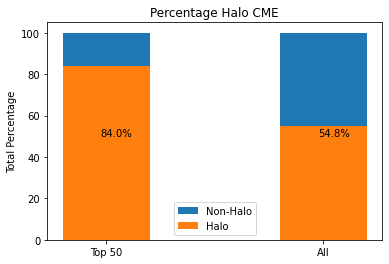

In [28]:
#Part 2 Question 3: Analysis
#Are a higher proportion of CMEs in the top 50 from NASA's observations Halo CMEs?
#I will use a bar graph to show the percentage of Halo CMEs in each category.

labels = 'Top 50', 'All'

fig, ax = plt.subplots()
halo_prop = [nasa_top['Halo'].value_counts()[True]/50 * 100, nasa['Halo'].value_counts()[True]/len(nasa.index) * 100]
n_halo_prop = [nasa_top['Halo'].value_counts()[False]/50 * 100, nasa['Halo'].value_counts()[False]/len(nasa.index) * 100]

ax.bar(labels, n_halo_prop, .4, bottom=halo_prop, label='Non-Halo')
ax.bar(labels, halo_prop, .4, label='Halo')

ax.set_ylabel('Total Percentage')
ax.set_title('Percentage Halo CME')
ax.legend()
ax.text(-.025,50, '%.1f%%' % halo_prop[0])
ax.text(0.975,50, '%.1f%%' % halo_prop[1])

plt.show()

#It appears that the top 50 CMEs from the NASA dataset do have a higher proportion of halo CMEs
#than the dataset as a whole.

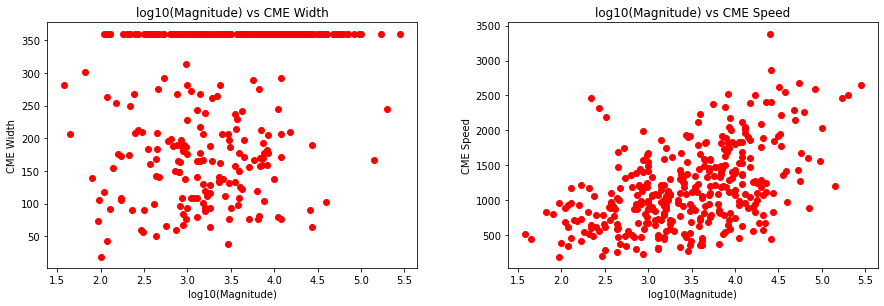

In [29]:
#Additionally does CME magnitude have any correlation with CME Width or CME Speed?
#To clarify, magnitude is a calculation of relative intensity based on the classification of a CME.
#To answer this, I will plot the logarithm in base 10 of the magnitude of individual observations
#against their CME Width and CME Speed respectively.

nasa = nasa.replace('360h', '360')

magnitudes = []
widths = []
speeds = []

for index, row in nasa.iterrows():
    if magnitude(row[7]) == 0 or np.isnan(float(row[10])) or np.isnan(float(row[12])):
        continue
    magnitudes.append(np.log10(magnitude(row[7])))
    widths.append(float(row[10]))
    speeds.append(float(row[12]))

fig, ax = plt.subplots(1, 2)

fig.tight_layout()

ax[0].scatter(magnitudes, widths, color='r')
ax[0].set_title('log10(Magnitude) vs CME Width')
ax[0].set_ylabel('CME Width')
ax[0].set_xlabel('log10(Magnitude)')

ax[1].scatter(magnitudes, speeds, color='r')
ax[1].set_title('log10(Magnitude) vs CME Speed')
ax[1].set_ylabel('CME Speed')
ax[1].set_xlabel('log10(Magnitude)')

plt.subplots_adjust(right = 2)

#There is no visible correlation between log10(Magnitude) and CME Width. Additionally, a large portion of the datapoints
#have CME=360 which significantly skews the distribution towards high CME.

#There appears to be a moderate possitive correlation between log10(Magnitude) and CME Speed.